<div align="right" vertical-align="middle" style="border: 2px solid;border-radius: 5px;background-color:lightgrey;padding:5px;padding-right:20px;padding-left:10px;">
        <a style="color:black;text-decoration:none;" title="Home" href="../index.ipynb">
            <img src="../../css/iconmonstr-christmas-house-icon.svg" height = "30" width = "30" style="display:inline">
        </a>
        &nbsp;
        <b>|</b>
        &nbsp;
        <a style="color:black;text-decoration:none;" title="Build" href="../build_docs/build.ipynb">
            <img src="../../css/iconmonstr-puzzle-icon.svg" height = "30" width = "30" style="display:inline">
        </a>
        <a style="color:black;text-decoration:none;" title="Assemble" href="../assemble_docs/assemble.ipynb">
            <img src="../../css/iconmonstr-puzzle-17-icon.svg" height = "30" width = "30" style="display:inline">
        </a>
        <a style="color:black;text-decoration:none;" title="Query" href="query.ipynb">
            <img src="../../css/iconmonstr-flask-3-icon.svg" height = "30" width = "30" style="display:inline">
        </a>
</div>

<h1> TUTORIAL: Visualizing Basic `EGRIN 2.0` queries </h1>

*In this tutorial, we will visualize gene expression resulting from basic EGRIN `2.0` queries*

*You can download a **blank version** of this tutorial for editing on your local machine [here](plot_expression_tutorial_blank.ipynb)*

<h3> Preliminaries </h3>

As described in the [System Requirements](index.ipynb), there are several dependencies that need to be satisfied to complete this tutorial, including:

- pymongo
- numpy
- pandas
- joblib
- scipy
- statsmodels
- itertools

To query the ensemble, we must first load all of the query functions.

In [7]:
from query.egrin2_query import *
from query.egrin2_plot import *

We will also define the host and the database that we'd like to use. `Host` is the name of the machine hosting the `EGRIN 2.0` MongoDB while `db` is the organism-specific `EGRIN 2.0` database name to query.  

In [1]:
host = "primordial"
db = "eco_db"

<h3> Basic queries </h3>

<h4> STEP 1: Find genes in a corem </h4>

Here we will retrieve genes and experiments in which these genes are co-regulated from a specific corem. 

This type of information can be retrieved using the `coremFinder` function. To call this function we need to specify:

- `x`: our query
- `x_type`: our query type. This could be corems, genes, conditions, GREs, or specific-coregulatory edges. In this case we will use `corem`.
- `y_type`: our target type. This is the type of information we would like to retrieve. The type can be any type described by `x_type`

In addition we include the `host` and `db` variables defined above.

In [3]:
corem = 1
corem_genes =  coremFinder(x = corem,x_type = "corem", y_type="genes",host=host,db=db)
corem_genes.sort()
print "\nThere are %s genes in corem %s, including:\n"  % (len(corem_genes),corem)
for i in corem_genes:
    print i + " is also called " + row2id( i, host=host, db=db, return_field = "name" )


There are 9 genes in corem 1, including:

b3313 is also called rplP
b3314 is also called rpsC
b3315 is also called rplV
b3316 is also called rpsS
b3317 is also called rplB
b3318 is also called rplW
b3319 is also called rplD
b3320 is also called rplC
b3321 is also called rpsJ


<h4> STEP 2: Find experiments where these genes are co-expressed</h4>

This query will also use the `coremFinder` function. To find `conditions` associated with our corem rather than genes, we simply change the `y_type` argument.

In [12]:
corem_conditions =  coremFinder(x = corem,x_type = "corem", y_type="conditions", host=host, db=db)
corem_conditions.sort()
print "\nThere are %s conditions in which these genes are co-regulated, including:\n" % len(corem_conditions)
for i in corem_conditions[0:10]:
    print i


There are 418 conditions in which these genes are co-regulated, including:

ATCC25404_wt_24hr_biofilm
ATCC25404_wt_R1drd19_24hr_biofilm
B178_mutant_Hsp60
B178_wt_Hsp60
BW25113_30C_biofilm
BW25113_R1drd19_15hr_biofilm
BW25113_R1drd19_24hr_biofilm
BW25113_uninduced_t0
BW25113_uninduced_t120
BW25113_uninduced_t180


<h4> STEP 3: Retrieve gene expression from the database </h4>

To retrieve gene expression values for these genes and experiments we use the `expressionFinder` function. To call this function we specific the `rows` (genes) and `columns` (conditions), as well as the `host` and `db` as before. 

In [5]:
gene_expression = expressionFinder(rows=corem_genes,cols=corem_conditions,host=host,db=db)

<h4> STEP 4. Plot expression values </h4>

We have several options for plotting these gene expression values. We could plot the expression values as lines, or in a heatmap, or even as a boxplot for all genes in each condition. 

Each of these visualizations is available by calling a single function, `plotExpression`. To call this function we must provide:

- `data`: this is the gene expression values, a Pandas data frame
- `plot_type`: this is the type of plot to draw. Can be `boxplot' (default), `line`, or `heatmap`
- `ipynb`: logical indicating whether the plot will be drawn in an iPython notebook
- `sort`: optionally sort the data (default: `FALSE`)

It's important to note that this function only requires a Pandas data frame, meaning you can use it to plot any kind of data (e.g. loaded from a text file).

Additionally, if we are producing the plot in an iPython notebook, we need to set the argument `ipynb` = `TRUE` and call an additional function `py.iplot` on the value returned from `plotExpression`.

Below are three examples, calling the `plotExpression` function with three different values for the `plot_type` argument: `line`, `heatmap`, and `boxplot`.

In [8]:
line_plot = plotExpression( data = gene_expression, plot_type = "line", ipynb = True, sort = False )
py.iplot( line_plot )

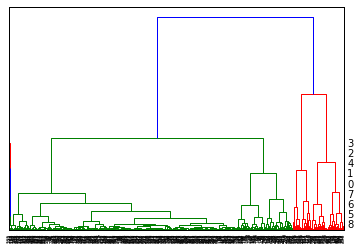

In [9]:
heatmap = plotExpression( data = gene_expression, plot_type = "heatmap", ipynb = True )
py.iplot( heatmap )

In [10]:
boxplot = plotExpression( gene_expression, plot_type = "boxplot", ipynb = True )
py.iplot( boxplot )

<h4> Putting it all together </h4>

Here is the code. You can copy this to your own notebook or download a *blank slate* notebook [here](plot_expression_tutorial_blank.ipynb).

In [11]:
# PLOT GENE EXPRESSION

# prelims
from query.egrin2_query import *
host = "primordial"
db = "eco_db2"

corem = 1
# find corem genes
corem_genes =  coremFinder(x = corem,x_type = "corem", y_type="genes",host=host,db=db)
# find corem conditions
corem_conditions =  coremFinder(x = corem,x_type = "corem", y_type="conditions", host=host, db=db)
# get gene expression
gene_expression = expressionFinder(rows=corem_genes,cols=corem_conditions,host=host,db=db)
# plot
plot = plotExpression( data = gene_expression, plot_type = "line", ipynb = True, sort = False )
py.iplot( plot )